In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 94.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random as rand
import transformers
import re

from PIL import Image
from transformers import pipeline

from sklearn.metrics import f1_score, accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Colab Notebooks/vqa/

Mounted at /content/gdrive


In [93]:
%cd /content/gdrive/My Drive/Colab Notebooks/vqa/

vqa_pipeline = pipeline("visual-question-answering")

image =  Image.open("images/boston_real_27.jpg")
question = "Is this from boston marathon bombing?"

vqa_pipeline(image, question, top_k=1)

No model was supplied, defaulted to dandelin/vilt-b32-finetuned-vqa and revision 4355f59 (https://huggingface.co/dandelin/vilt-b32-finetuned-vqa).
Using a pipeline without specifying a model name and revision in production is not recommended.


/content/gdrive/My Drive/Colab Notebooks/vqa


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


[{'score': 0.9969515800476074, 'answer': 'no'}]

In [5]:
df1=pd.read_table ('tweets_2.txt')
df2=pd.read_table ('tweets.txt')

In [11]:
df1

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake
...,...,...,...,...,...,...,...
14272,443231991593304064,@BobombDom *slaps TweetDeck with the PigFish h...,2179310905,pigFish_01,Da_Vault_Hunter,Tue Mar 11 03: 48: 36 +0000 2014,fake
14273,443086239127076865,New Species of Fish found in Brazil or just Re...,254843101,pigFish_01,DjSituation_RC,Mon Mar 10 18: 09: 26 +0000 2014,fake
14274,442978105238753280,What do we call this? #pigFISH http: \/\/t.co\...,2367553228,pigFish_01,Vivo1Vuyo,Mon Mar 10 10: 59: 45 +0000 2014,fake
14275,442753479782989824,Pigfish ? E dopo il pescecane c'è il pesce mai...,603120231,pigFish_01,CosimoTarta,Sun Mar 09 20: 07: 10 +0000 2014,fake


In [12]:
df2

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,578854927457349632,kereeen RT @Shyman33: Eclipse from ISS.... htt...,70824972,eclipse_01,peay_s,Fri Mar 20 09:45:43 +0000 2015,fake
1,578874632670953472,Absolutely beautiful! RT @Shyman33: Eclipse fr...,344707006,eclipse_01,JaredUcanChange,Fri Mar 20 11:04:02 +0000 2015,fake
2,578891261353984000,“@Shyman33: Eclipse from ISS.... http://t.co/C...,224839607,eclipse_01,tpjp1231,Fri Mar 20 12:10:06 +0000 2015,fake
3,578846612312748032,Eclipse from ISS.... http://t.co/En87OtvsU6,134543073,eclipse_01,Shyman33,Fri Mar 20 09:12:41 +0000 2015,fake
4,578975333841551360,@ebonfigli: Éclipse vue de l'ISS... Autre chos...,1150728872,eclipse_01,Epimethee_,Fri Mar 20 17:44:11 +0000 2015,fake
...,...,...,...,...,...,...,...
3750,578433150071775232,Un présentateur de la ZDF confesse avoir truqu...,257551211,varoufakis_1,Cdt_Sylvestre,Thu Mar 19 05:49:44 +0000 2015,fake
3751,578433646597656576,"Oh les kleine menteurs ""@CorineBarella: Un pré...",27575883,varoufakis_1,damomarc,Thu Mar 19 05:51:42 +0000 2015,fake
3752,578486910491996160,Este es el programa de ZDF en el que confirman...,2049211,varoufakis_1,javierpascual,Thu Mar 19 09:23:21 +0000 2015,fake
3753,578505023912591360,11.34 - wir haben FAST Mittag ▶ Riesen Verwirr...,262222386,varoufakis_1,aotto1968_2,Thu Mar 19 10:35:20 +0000 2015,fake


In [6]:
df1.columns

Index(['tweetId', 'tweetText', 'userId', 'imageId(s)', 'username', 'timestamp',
       'label'],
      dtype='object')

In [7]:
df1.dtypes

tweetId        int64
tweetText     object
userId         int64
imageId(s)    object
username      object
timestamp     object
label         object
dtype: object

In [94]:
df = pd.DataFrame(columns = ['imageId', 'question', 'image', 'label', 'pred'])
missing = ['varoufakis_1', 'syrianboy_1', 'eclipse_video_01', 'boston_fake_10','sandyB_real_6', 'sandyB_real_6', 'boston_fake_35','boston_real_05']
event = {}
event ['boston_fake'] = 'Boston marathon bombing'
event ['boston_real'] = 'Boston marathon bombing'
event ['underwater_fake'] = 'underwater bedroom'
event ['eclipse'] = 'solar eclipse'
event ['sochi_fake'] = 'Sochi Olympics'
event ['samurai'] = 'a real samurai ghost'
event ['elephant_fake'] = 'a real rock elephant'
event ['pigFish'] = 'Pig Fish'
event ['passport'] = 'a real passport'
event ['nepal'] = 'eathquake in Nepal'
event ['malaysia_fake'] = 'MA flight 370'
event ['livr'] = 'Livr mobile app'
event ['sandyA_fake'] = 'Sandy hurricane'
event ['sandyB_fake'] = 'Sandy hurricane'
event ['sandyA_real'] = 'Sandy hurricane'
event ['sandyB_real'] = 'Sandy hurricane'
event ['garissa'] = 'Garissa Attack'
event ['columbianChemicals_fake'] = 'Columbian Chemicals'
event ['bringback_fake'] = 'Bring Back Our Girls'

In [95]:
for index, row in df1.iterrows():
  id_lst = re.split(',', row['imageId(s)'].rstrip())
  for i in range (len(id_lst)):
    if id_lst[i] in missing: continue
    key = id_lst[i].rpartition('_')[0]
    evnt = event[key]
    ques = 'Is this '+evnt+'?'
    img = id_lst[i]+'.jpg'
    if row['label'] =='real' : label = 'real'
    else: label = 'fake'
    df.loc[len(df.index)] = [id_lst[i], ques, img, label, ''] 



In [96]:
for index, row in df2.iterrows():
  id_lst = re.split(',', row['imageId(s)'].rstrip())
  for i in range (len(id_lst)):
    if id_lst[i] in missing: 
      continue
    #print (id_lst[i])
    key = id_lst[i].rpartition('_')[0]
    evnt = event[key]
    ques = 'Is this '+evnt+'?'
    img = id_lst[i]+'.jpg'
    if row['label'] =='real' : label = 'real'
    else: label = 'fake'
    df.loc[len(df.index)] = [id_lst[i], ques, img, label, ''] 


In [97]:
df['label'].value_counts()

fake    10178
real     6148
Name: label, dtype: int64

In [68]:
for index, row in df['image'].value_counts():
  print (row[''])

pandas.core.series.Series

In [93]:
def predict (row):
  ques = row['question']
  image = Image.open('images/'+row['image'])
  if vqa_pipeline(image, question, top_k=1)[0]['answer']=='yes': return 'real'
  else: return 'fake'

In [98]:
image_dict={}
for index, row in df.iterrows():
  #if row['pred']!='':continue
  if index%500==0: print (f"processing{index}")
  if row['image'] in image_dict: 
    df.at[index,'pred']= image_dict[row['image']]
    continue
  pred=''
  image = Image.open('images/'+row['image'])
  question = row['question']
  if vqa_pipeline(image, question, top_k=1)[0]['answer']=='yes': pred='real'
  else: pred='fake'
  df.at[index,'pred'] = pred
  image_dict[row['image']] = pred

processing0
processing500
processing1000
processing1500
processing2000
processing2500
processing3000
processing3500
processing4000
processing4500
processing5000
processing5500
processing6000
processing6500
processing7000
processing7500
processing8000
processing8500
processing9000
processing9500
processing10000
processing10500
processing11000
processing11500
processing12000
processing12500
processing13000
processing13500
processing14000
processing14500
processing15000
processing15500
processing16000


In [99]:
df.to_csv('pred.csv', index=False, encoding = 'utf-8-sig')

from google.colab import files
files.download('pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [100]:
df

,imageId,question,image,label,pred
0,sandyA_fake_46,Is this Sandy hurricane?,sandyA_fake_46.jpg,fake,real
1,sandyA_fake_09,Is this Sandy hurricane?,sandyA_fake_09.jpg,fake,fake
2,sandyA_fake_09,Is this Sandy hurricane?,sandyA_fake_09.jpg,fake,fake
3,sandyA_fake_29,Is this Sandy hurricane?,sandyA_fake_29.jpg,fake,fake
4,sandyA_fake_15,Is this Sandy hurricane?,sandyA_fake_15.jpg,fake,fake
...,...,...,...,...,...
16321,garissa_04,Is this Garissa Attack?,garissa_04.jpg,real,real
16322,garissa_04,Is this Garissa Attack?,garissa_04.jpg,real,real
16323,garissa_04,Is this Garissa Attack?,garissa_04.jpg,real,real
16324,garissa_04,Is this Garissa Attack?,garissa_04.jpg,real,real


In [101]:
accuracy_score(df['label'], df['pred'])

0.7062354526522112

In [102]:
confusion_matrix(df['label'], df['pred'])

array([[8368, 1810],
       [2986, 3162]])

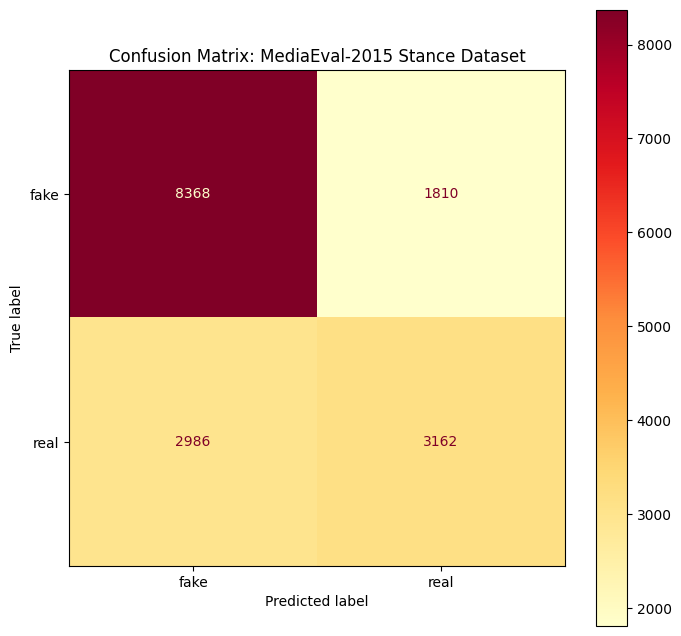

In [112]:
fig,ax=plt.subplots(figsize=(8,8))
ConfusionMatrixDisplay.from_predictions(df['label'], df['pred'], cmap='YlOrRd', ax=ax)
plt.title('Confusion Matrix: MediaEval-2015 Stance Dataset')
plt.show()

In [113]:
print(classification_report(df['label'], df['pred']))

              precision    recall  f1-score   support

        fake       0.74      0.82      0.78     10178
        real       0.64      0.51      0.57      6148

    accuracy                           0.71     16326
   macro avg       0.69      0.67      0.67     16326
weighted avg       0.70      0.71      0.70     16326

